In [1]:
from collections import Counter
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

import anndata
import scanpy as sc

In [2]:
import matplotlib as mpl

In [3]:
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)

In [4]:
orig_data_path = "/home/sr2464/scratch/C2S_Files/CellOT_files/pancreas_data/harmony_common_pancreas.h5ad"
BASE_PATH = "/home/sr2464/scratch/C2S_Files/CellOT_files/pancreas_training_runs/run7_X_pca/evals_iid_data_space"
cell_ot_transported_data_path = os.path.join(BASE_PATH, "imputed.h5ad")

In [5]:
orig_adata = anndata.read_h5ad(orig_data_path)
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'species_label_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
cell_ot_transport_adata = anndata.read_h5ad(cell_ot_transported_data_path)
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

In [7]:
orig_adata_reduced = anndata.AnnData(
    X=orig_adata.obsm["X_pca"],
    var=cell_ot_transport_adata.var.copy(),
    obs=orig_adata.obs.copy()
)

<ipython-input-7-58f7d54dd4c1>:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  orig_adata_reduced = anndata.AnnData(


In [8]:
orig_adata_reduced.obsm["X_pca"] = orig_adata_reduced.X

In [9]:
orig_adata_reduced

AnnData object with n_obs × n_vars = 9436 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    obsm: 'X_pca'

In [10]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

# Visualize original cells

In [25]:
mpl.rcParams['figure.facecolor'] = 'white'

In [16]:
del orig_adata_reduced.obsm
del orig_adata_reduced.varm
del orig_adata_reduced.obsp
del orig_adata_reduced.uns

In [17]:
orig_adata_reduced

AnnData object with n_obs × n_vars = 9436 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'

In [18]:
sc.tl.pca(orig_adata_reduced)

In [19]:
sc.pp.neighbors(orig_adata_reduced)

/gpfs/radev/home/sr2464/.conda/envs/cellot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
sc.tl.umap(orig_adata_reduced)

In [21]:
orig_adata_reduced

AnnData object with n_obs × n_vars = 9436 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [22]:
orig_adata_reduced.raw

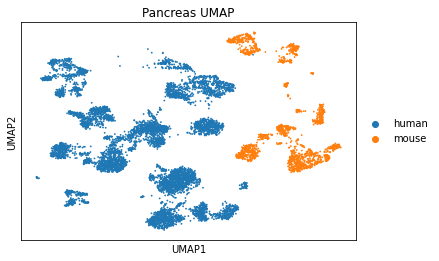

In [26]:
sc.pl.umap(
    orig_adata,
    color="species_label",
    title="Pancreas UMAP",
    show=False,
)
plt.savefig(os.path.join(BASE_PATH, "orig_adata_reduced_umap.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Visualize cells

In [31]:
del cell_ot_transport_adata.obsm
del cell_ot_transport_adata.uns
del cell_ot_transport_adata.varm
del cell_ot_transport_adata.obsp

In [32]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

In [33]:
sc.tl.pca(cell_ot_transport_adata)
# cell_ot_transport_adata.obsm["X_pca"] = cell_ot_transport_adata.X

In [34]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [35]:
cell_ot_transport_adata.obsm["X_pca"].shape

(500, 49)

In [36]:
sc.pp.neighbors(cell_ot_transport_adata)

In [37]:
sc.tl.umap(cell_ot_transport_adata)

In [38]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [39]:
cell_ot_transport_adata.obs.head()

,cell_barcodes,cell_manual_ids,cell_types,batch_sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,species_cell_type_label,species_label,transport,split
human1_lib1.final_cell_0032,AATATCTTC-ATGTTGGC,human1_lib1.final_cell_0032,delta,GSM2230757_human1_umifm_counts,2002,2002,7051.0,0.0,0.0,human_delta,human,source,test
human1_lib1.final_cell_0034,GACACGGACT-CTGAGTGC,human1_lib1.final_cell_0034,delta,GSM2230757_human1_umifm_counts,1698,1698,6475.0,0.0,0.0,human_delta,human,source,test
human1_lib1.final_cell_0041,GTAACGTT-ATGACTTT,human1_lib1.final_cell_0041,activated_stellate,GSM2230757_human1_umifm_counts,3377,3377,12169.0,0.0,0.0,human_activated_stellate,human,source,test
human1_lib1.final_cell_0088,ACTAGATTG-TCCCAATC,human1_lib1.final_cell_0088,beta,GSM2230757_human1_umifm_counts,2069,2068,5979.0,0.0,0.0,human_beta,human,source,test
human1_lib1.final_cell_0135,GAGCGTTGCT-AACACACG,human1_lib1.final_cell_0135,alpha,GSM2230757_human1_umifm_counts,2460,2460,6151.0,0.0,0.0,human_alpha,human,source,test


In [40]:
Counter(cell_ot_transport_adata.obs["species_label"].tolist())

Counter({'human': 500})

In [41]:
Counter(cell_ot_transport_adata.obs["split"].tolist())

Counter({'test': 500})

In [42]:
Counter(cell_ot_transport_adata.obs["transport"].tolist())

Counter({'source': 500})

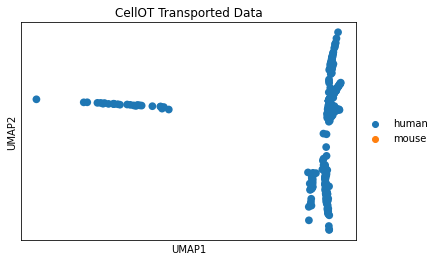

In [45]:
sc.pl.umap(
    cell_ot_transport_adata,
    color="species_label",
    title="CellOT Transported Data",
    show=False,
)
plt.savefig(os.path.join(BASE_PATH, "cell_ot_transport_adata_umap.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Comebine adatas, see where transported cells are

In [46]:
del orig_adata_reduced.obsm
del orig_adata_reduced.uns
del orig_adata_reduced.varm
del orig_adata_reduced.obsp

In [47]:
del cell_ot_transport_adata.obsm
del cell_ot_transport_adata.uns
del cell_ot_transport_adata.varm
del cell_ot_transport_adata.obsp

In [48]:
orig_adata_reduced

AnnData object with n_obs × n_vars = 9436 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'

In [49]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

In [50]:
orig_data_label = ["Original Data (" + species_label + ")" for species_label in orig_adata_reduced.obs["species_label"]]
orig_adata_reduced.obs["transport_flag"] = orig_data_label
cell_ot_transport_adata.obs["transport_flag"] = "Transported Cells"

In [51]:
combined_adata = orig_adata_reduced.concatenate(cell_ot_transport_adata)
combined_adata

/gpfs/radev/home/sr2464/.conda/envs/cellot/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'

In [52]:
combined_adata

AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'

# Visualize

In [53]:
sc.tl.pca(combined_adata)

In [54]:
sc.pp.neighbors(combined_adata)

In [55]:
sc.tl.umap(combined_adata)

In [56]:
combined_adata

AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

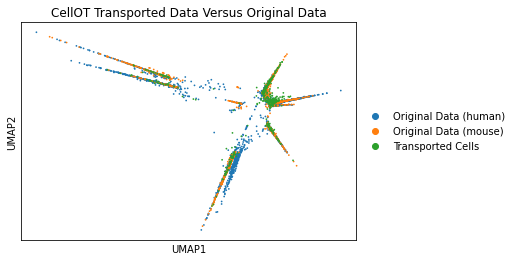

In [57]:
sc.pl.umap(
    combined_adata,
    color="transport_flag",
    title="CellOT Transported Data Versus Original Data",
    show=False
)
plt.savefig(os.path.join(BASE_PATH, "cell_ot_human_transported_vs_orig_data.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()